# Caviar

# Imports

#### Standard library imports

In [1]:
import sys

#### Third party imports

In [2]:
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt

#### Local application imports

In [3]:
sys.path.append("../../")

In [89]:
%load_ext autoreload
%autoreload 2

from adj_matrix.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

## Obtaining data

In [5]:
phases, G = download_caviar_data()

In [6]:
phases

{1:      n1  n4  n89  n83  n3  n5  n88  n85  n90  n2  n7  n54  n6  n64  n8
 n1    0   1    4    0   4   2    2    9    1   2   0    2   0    1   1
 n4    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n89   1   0    0    0   0   0    0    0    0   0   3    0   0    0   0
 n83   1   0    0    0   0   0    0    0    0   0   0    0   5    0   0
 n3    2   0    0    0   0   0    1    0    0   0   0    0   0    0   0
 n5    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n88   1   0    0    0   1   0    0    3    0   0   0    0   1    0   0
 n85   1   0    0    0   0   0    2    0    0   0   0    0   5    0   0
 n90   0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n2    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n7    0   0    2    0   0   0    0    0    0   0   0    0   0    0   0
 n54   0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n6    0   0    0    0   0   0    1    0    0   0   0    0   

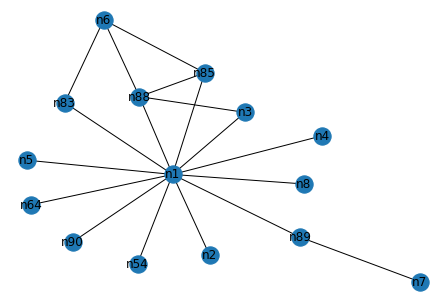

In [9]:
num = 1
nx.draw(
    G[num],
    pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
    with_labels=True
)

# Contenido del reporte

## Introducción

Caviar se refiere a una investigación criminal coordinada por autoridades de Canadá durante los años 1994 a 1996. El objetivo de esta investigación era entender las interacciones entre los distintos criminales que operaban en Canadá. Durante el periodo de dos años, las autoridades canadienses intervinieron 11 veces las comunicaciones de los criminales para entender como se relacionaban. Se generó un conjunto de datos distinto con cada una de estas intervenciones.

Los datos de esta investigación permiten analizar los cambios en la red de criminales a través del tiempo y el cambio de circunstancias. Se dio seguimiento a un total de 110 criminales, de los cuales 82 eran traficantes de drogas y 28 no traficantes.

## Matriz de adjacencia

### ¿Cómo está configurada la matriz de adjacencia?

Dado que se trata de un caso **no dirigido**, se elaboraron 11 matrices **simétricas de adyacencia**. Cada matriz relaciona al grupo de criminales con base en interacciones entre ellos.

Extracto de una matriz de adyacencia:

In [10]:
phases[1]

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8
n1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
n4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
n83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
n3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
n5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
n85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
n90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploración general

### ¿Cómo fueron evolucionando las matrices de adjacencia? (nodos y conexiones)

Comenzamos explorando las matrices de adyacencia y como estas fueron evolucionando a lo largo de los 11 cortes de tiempo (intervenciones). A continuación se presenta una gráfica con un conteo del número de nódos y conexiones a través del tiempo:

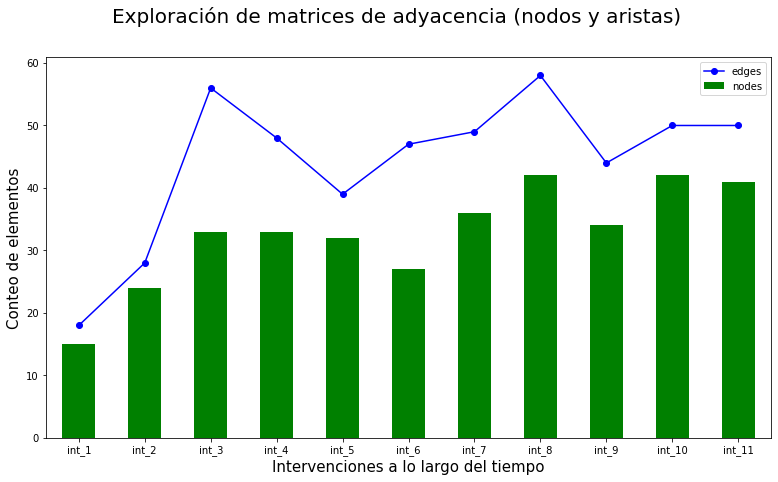

In [61]:
adys_in_time_plot(G)

Los registros de las autoridades indican que hay 4 fases importantes en las que podemos clasificar cada una de las 11 intervenciones. A continuación enlistaremos los sucesos más importantes de cada fase, así como atributos presentes en la gráfica de *Exploración de matrices de adyacencia (nodos y aristas)* que los sustentan:

- **Fase 1: crecimiento de la red (intervenciones 1-3)**
    - Sucesos más importantes en registros:
        - En esta fase las autoridades recabaron información de la red por primera vez.
        - Las autoridades no intervinieron con la red.
    - Observaciones en la gráfica:
        - Vemos un crecimiento importante, tanto en el número de nodos (de 15 a 33), como en el número de aristas (de 18 a 56).
        

- **Fase 2: decomisión y cambio de actividades (intervenciones 4-5)**
    - Sucesos más importantes en registros:
        - Se hace la primera decomisión de drogas a la red criminal.
        - Las autoridades implementan medidas para dificultar la operación de la red.
        - Ingresa a la red un traficante colombiano que juega un papel importante en la red.
    - Observaciones en la gráfica:
        - La red solamente pierde 1 nodo, pero sus conexiones bajan drasticamente (de 56 a 3)
        

- **Fase 3: reestructuración (intervenciones 6)**
    - Sucesos más importantes en registros:
        - La red criminal se reorganiza ante la entrada del participante colombiano.
    - Observaciones en la gráfica:
        - El número de nodos baja considerablemente (de 32 a 27), pero las conexiones aumentan (de 39 a 37)
        

- **Fase 4: red bajo estrés (intervenciones 7-11)**
    - Sucesos más importantes en registros:
        - Las autoridades realizan varias decomisiones de drogas a la red criminal.
        - Se implementan varias acciones por parte de las autoridades que obstaculizan la operación de la red.
    - Observaciones en la gráfica:
        - Se observa variabilidad en el número de nodos y aristas de la red en esta fase.

## Caracteristicas globales

### ¿Qué criminal podría ser considerado como la mente maestra de esta red?
- eigenvector

#### Cálculo para cada una de las épocas

In [ ]:
dict_x = {}

for num in G:
    dfx = pd.DataFrame.from_dict(nx.eigenvector_centrality(G[num]), orient="index")
    dfx.sort_values(by=0, ascending=False, inplace=True)
    dfx.reset_index(inplace=True)
    dfx[num] = dfx.apply(lambda x: (x["index"], round(x[0], 2)), axis = 1)
    dfx = dfx.loc[0:2, [num]]

    dict_x[num] = dfx

In [ ]:
dfx = pd.concat([dict_x[num] for num in dict_x], axis=1)
dfx.index = range(1, 4)
dfx

#### Cálculo promedio de todas las épocas

In [ ]:
dict_x = {}

for num in G:
    dfx = pd.DataFrame.from_dict(nx.eigenvector_centrality(G[num]), orient="index")
    dfx.columns = [num]
    dfx[num] = dfx[num].apply(lambda x: round(x, 2))

    dict_x[num] = dfx

In [ ]:
dfx = pd.concat([dict_x[num] for num in dict_x], axis=1)
dfx[dfx.isna()] = 0
dfx["mean"] = dfx.mean(axis=1)
dfx.sort_values(by="mean", ascending=False, inplace=True)
dfx = dfx.loc[:, ["mean"]].iloc[0:5, :]
dfx

### ¿Qué criminales podrían ser considerado como actores activos relevantes?
- Intermediación

#### Cálculo para cada una de las épocas

In [ ]:
dict_x = {}

for num in G:
    dfx = pd.DataFrame.from_dict(nx.betweenness_centrality(G[num], normalized=True), orient="index")
    dfx.sort_values(by=0, ascending=False, inplace=True)
    dfx.reset_index(inplace=True)
    dfx[num] = dfx.apply(lambda x: (x["index"], round(x[0], 2)), axis = 1)
    dfx = dfx.loc[0:2, [num]]

    dict_x[num] = dfx

In [ ]:
dfx = pd.concat([dict_x[num] for num in dict_x], axis=1)
dfx.index = range(1, 4)
dfx

#### Cálculo promedio de todas las épocas

In [ ]:
dict_x = {}

for num in G:
    dfx = pd.DataFrame.from_dict(nx.betweenness_centrality(G[num], normalized=True), orient="index")
    dfx.columns = [num]
    dfx[num] = dfx[num].apply(lambda x: round(x, 2))

    dict_x[num] = dfx

In [ ]:
dfx = pd.concat([dict_x[num] for num in dict_x], axis=1)
dfx[dfx.isna()] = 0
dfx["mean"] = dfx.mean(axis=1)
dfx.sort_values(by="mean", ascending=False, inplace=True)
dfx = dfx.loc[:, ["mean"]].iloc[0:5, :]
dfx

## Evolución en el tiempo

### ¿Cómo se ve la configuración de la red en distintos tiempos y por qué cambia?
- After the first seizure (Phase 4), traffic moved from Colombia 
    - Phase 1-3: Network growing
    - Phase 4-5 Seizure and change in activities (colombian)
    - Phase 6: Restructuring 
    - Phase 7-11: Network through stress


Ya con una idea más clara de lo que sucedió con la red de criminales a lo largo del tiempo, generamos visualizaciones de la red en todos los momentos del tiempo:

#### Fase 1

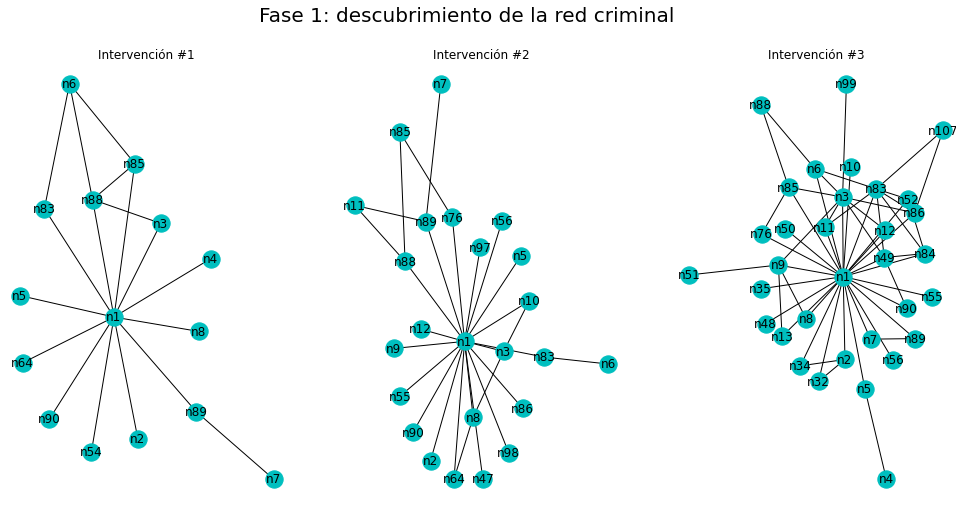

In [78]:
create_fase_nxs(G, range(1, 4), 0, "Fase 1: descubrimiento de la red criminal", "c")

#### Fase 2

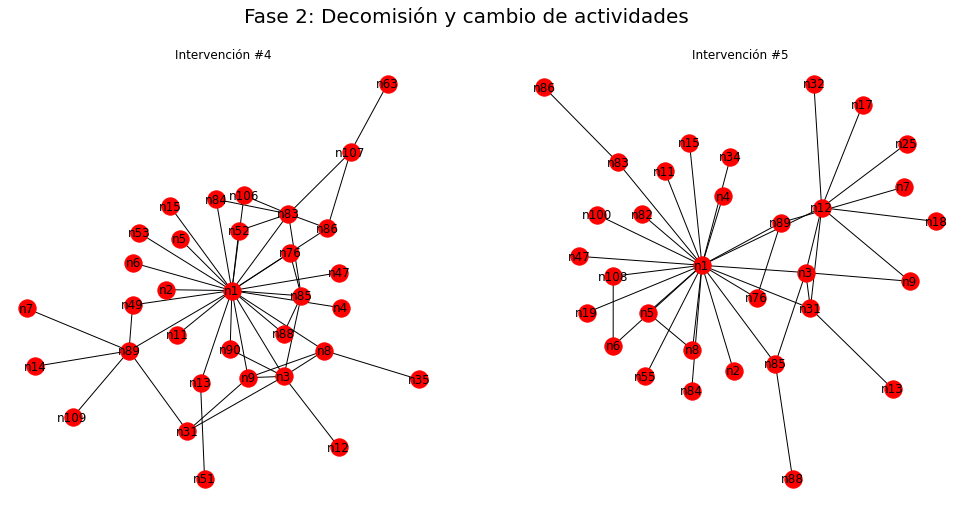

In [77]:
create_fase_nxs(G, range(1, 3), 3, "Fase 2: Decomisión y cambio de actividades", "r")

#### Fase 3

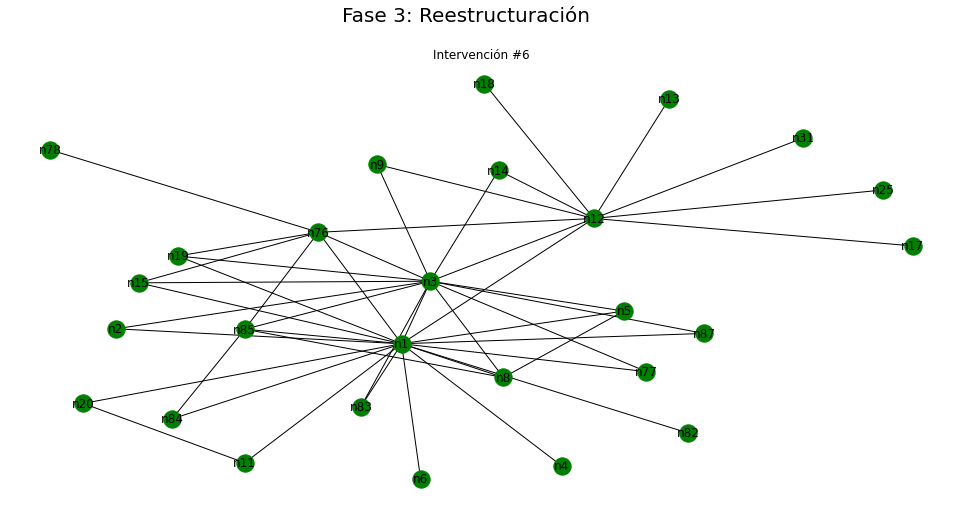

In [79]:
create_fase_nxs(G, range(1, 2), 5, "Fase 3: Reestructuración", "g")

#### Fase 4

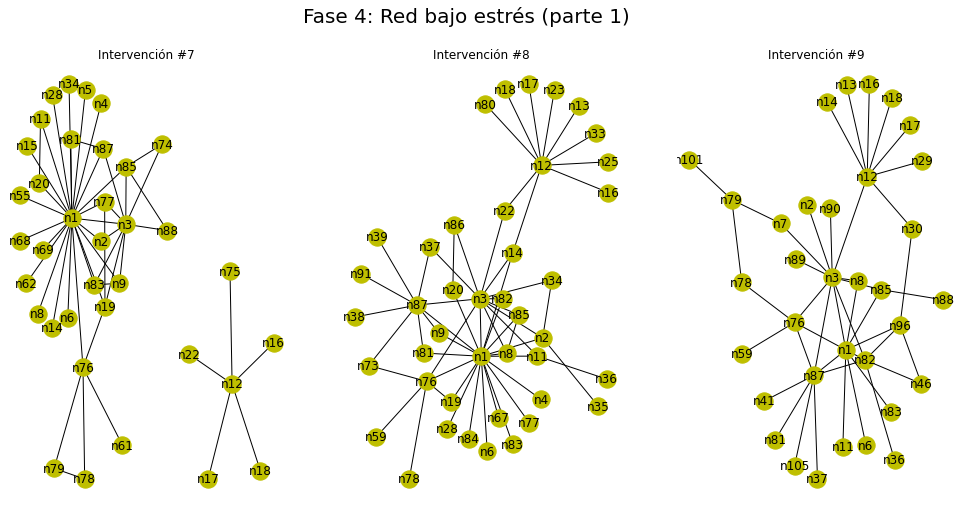

In [80]:
create_fase_nxs(G, range(1, 4), 6, "Fase 4: Red bajo estrés (parte 1)", "y")

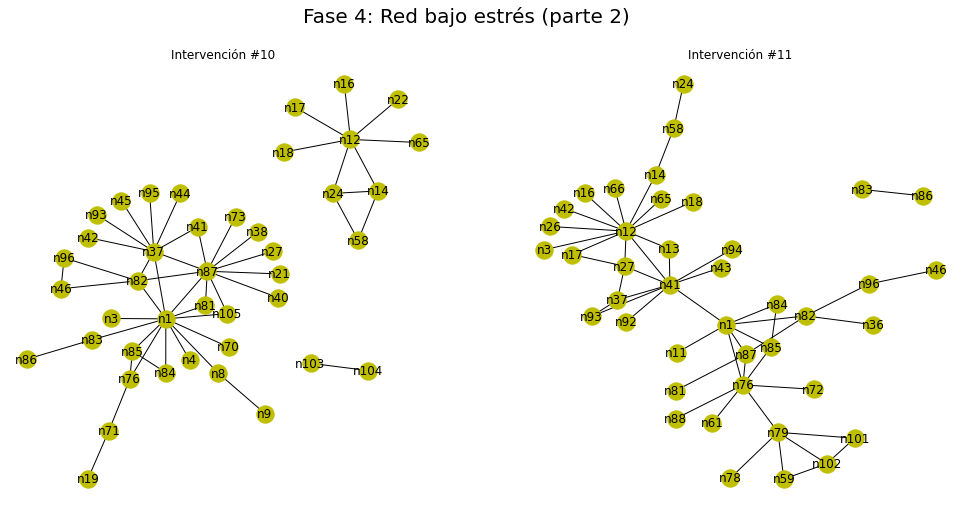

In [81]:
create_fase_nxs(G, range(1, 3), 9, "Fase 4: Red bajo estrés (parte 2)", "y")

## Medidas de centralidad para una selección de tiempos

### Grado

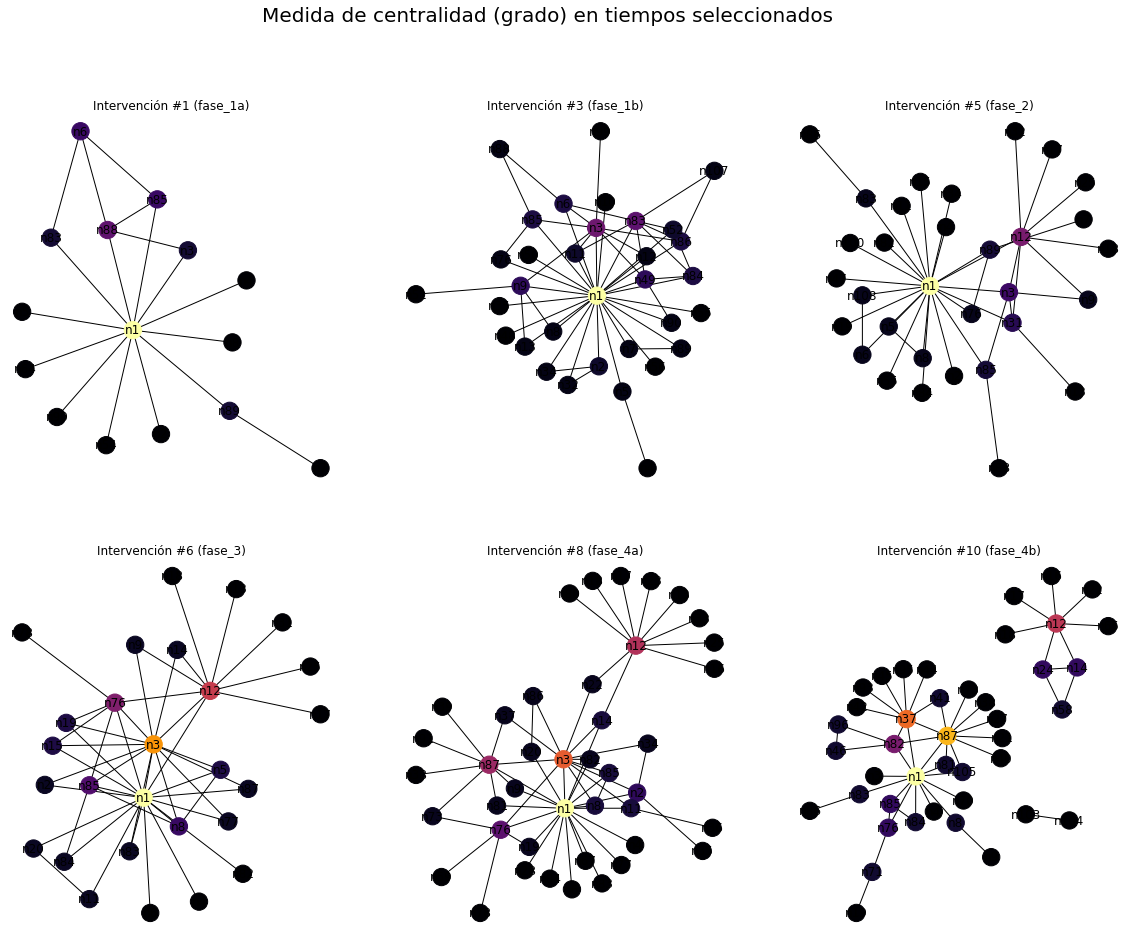

In [87]:
nums_cols = {
    "fase_1a": {
        "int": 1,
        "col": "b",
        "pos": (0, 0)
    },
    "fase_1b": {
        "int": 3,
        "col": "b",
        "pos": (0, 1)
    },
    "fase_2": {
        "int": 5,
        "col": "r",
        "pos": (0, 2)
    },
    "fase_3": {
        "int": 6,
        "col": "g",
        "pos": (1, 0)
    },
    "fase_4a": {
        "int": 8,
        "col": "y",
        "pos": (1, 1)
    },
    "fase_4b": {
        "int": 10,
        "col": "y",
        "pos": (1, 2)
    },
}
pos = {}
fig, ax = plt.subplots(2, 3, figsize=(20, 15))


for sel in nums_cols:
    
    num = nums_cols[sel]["int"]
    col = nums_cols[sel]["col"]
    pos = nums_cols[sel]["pos"]
    values = [nx.degree_centrality(G[num])[val] for val in nx.degree_centrality(G[num])]
    
    nx.draw(
        G[num],
        pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
        ax=ax[pos[0], pos[1]],
        with_labels=True,
        cmap=plt.get_cmap('inferno'),
        node_color=values
    )
    
    ax[pos[0], pos[1]].set_title("Intervención #" + str(num) + " (" + sel + ")")
    
    
fig.suptitle("Medida de centralidad (grado) en tiempos seleccionados", fontsize=20)

plt.show()

### Intermediación

In [ ]:
nums_cols = {
    "fase_1": {
        "int": 2,
        "col": "b",
        "pos": (0, 0)
    },
    "fase_2": {
        "int": 5,
        "col": "r",
        "pos": (0, 1)
    },
    "fase_3": {
        "int": 6,
        "col": "g",
        "pos": (1, 0)
    },
    "fase_4": {
        "int": 11,
        "col": "y",
        "pos": (1, 1)
    },
}
pos = {}
fig, ax = plt.subplots(2, 2, figsize=(20, 15))


for sel in nums_cols:
    
    num = nums_cols[sel]["int"]
    col = nums_cols[sel]["col"]
    pos = nums_cols[sel]["pos"]
    values = [nx.betweenness_centrality(G[num])[val] for val in nx.betweenness_centrality(G[num])]
    
    nx.draw(
        G[num],
        pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
        ax=ax[pos[0], pos[1]],
        with_labels=True,
        cmap=plt.get_cmap('inferno'),
        node_color=values
    )
    
    ax[pos[0], pos[1]].set_title("Intervención #" + str(num))
    
    
fig.suptitle("Medida de centralidad (intermediación) en tiempos seleccionados", fontsize=20)

plt.show()

### Cercanía

In [ ]:
nums_cols = {
    "fase_1": {
        "int": 2,
        "col": "b",
        "pos": (0, 0)
    },
    "fase_2": {
        "int": 5,
        "col": "r",
        "pos": (0, 1)
    },
    "fase_3": {
        "int": 6,
        "col": "g",
        "pos": (1, 0)
    },
    "fase_4": {
        "int": 11,
        "col": "y",
        "pos": (1, 1)
    },
}
pos = {}
fig, ax = plt.subplots(2, 2, figsize=(20, 15))


for sel in nums_cols:
    
    num = nums_cols[sel]["int"]
    col = nums_cols[sel]["col"]
    pos = nums_cols[sel]["pos"]
    values = [nx.closeness_centrality(G[num])[val] for val in nx.closeness_centrality(G[num])]
    
    nx.draw(
        G[num],
        pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
        ax=ax[pos[0], pos[1]],
        with_labels=True,
        cmap=plt.get_cmap('inferno'),
        node_color=values
    )
    
    ax[pos[0], pos[1]].set_title("Intervención #" + str(num))
    
    
fig.suptitle("Medida de centralidad (intermediación) en tiempos seleccionados", fontsize=20)

plt.show()

### Eigenvector

In [ ]:
nums_cols = {
    "fase_1": {
        "int": 2,
        "col": "b",
        "pos": (0, 0)
    },
    "fase_2": {
        "int": 5,
        "col": "r",
        "pos": (0, 1)
    },
    "fase_3": {
        "int": 6,
        "col": "g",
        "pos": (1, 0)
    },
    "fase_4": {
        "int": 11,
        "col": "y",
        "pos": (1, 1)
    },
}
pos = {}
fig, ax = plt.subplots(2, 2, figsize=(20, 15))


for sel in nums_cols:
    
    num = nums_cols[sel]["int"]
    col = nums_cols[sel]["col"]
    pos = nums_cols[sel]["pos"]
    values = [nx.eigenvector_centrality(G[num])[val] for val in nx.eigenvector_centrality(G[num])]
    
    nx.draw(
        G[num],
        pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
        ax=ax[pos[0], pos[1]],
        with_labels=True,
        cmap=plt.get_cmap('inferno'),
        node_color=values
    )
    
    ax[pos[0], pos[1]].set_title("Intervención #" + str(num))
    
    
fig.suptitle("Medida de centralidad (eigenvector) en tiempos seleccionados", fontsize=20)

plt.show()

## Detección de comunidades

### Visual

Ahora que tenemos una idea más clara de la red criminal y su evolución a lo largo del tiempo, continuaremos con un análisis más profundo de esta apoyándonos de la *teoría de redes*.

Con el fin de simplificar el análisis, optamos por hacer una selección de 5 redes que consideramos representativas de cada una de las fases mencionadas. A continuación presentamos las 5 intervenciones seleccionadas:

- **Fase 1: crecimiento de la red (intervenciones 1-3)**
    - Intervención #2

- **Fase 2: decomisión y cambio de actividades (intervenciones 4-5)**
    - Intervención #5

- **Fase 3: reestructuración (intervenciones 6)**
    - Intervención #6

- **Fase 4: red bajo estrés (intervenciones 7-11)**
    - Intervención #8
    - Intervención #10

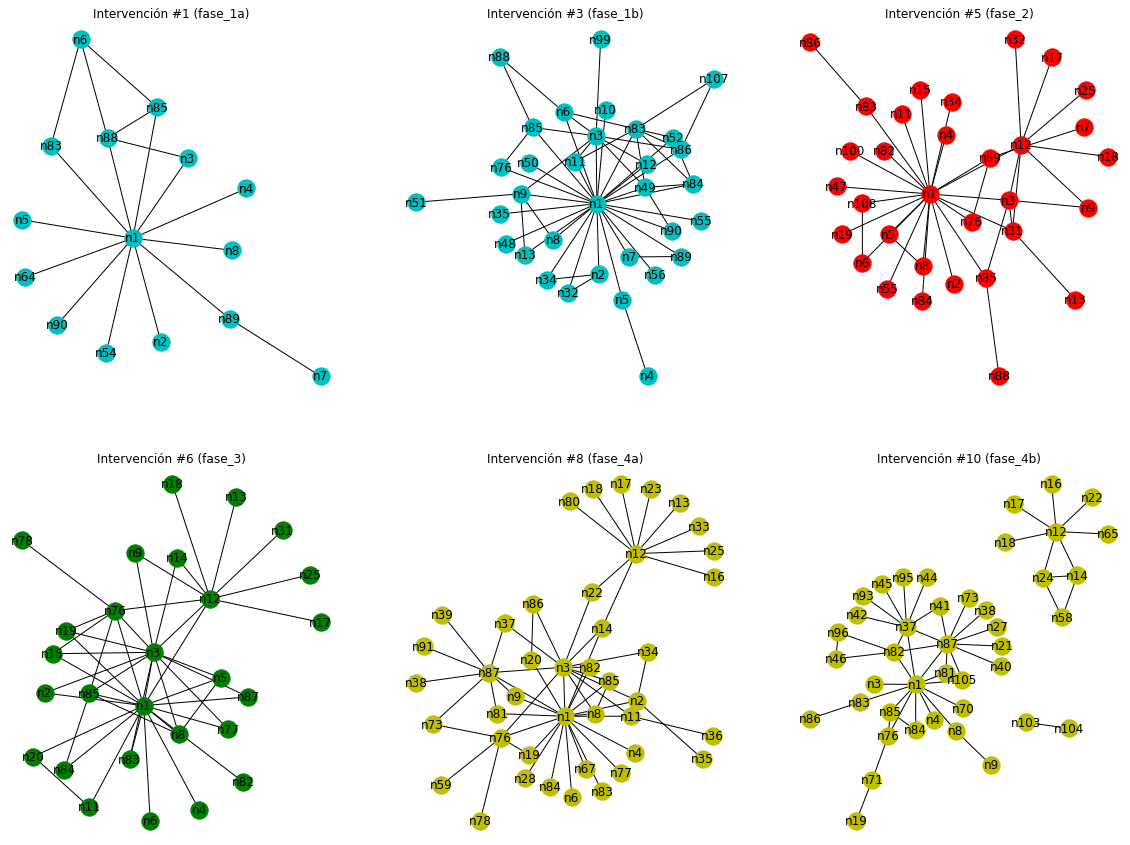

In [92]:
networks_deep_analysis(G, nums_cols, "visual")

Con base en esta primera exploración, notamos lo siguiente:

- En la mayoría de las intervenciones observamos que solo hay una gran red de criminales que no está seccionada. Solamente en algunos casos (e.g. Intervención #10 de la Fase 4) vemos que se crean nuevas redes que operan de forma independiente.

- El criminal representado por el nodo *n1* (Daniel Serero) juega un rol central en la red.

- A partir de la Fase 2, el criminal representado por el nodo *n12* comienza a jugar un papel más importante en la red criminal.

### Modularidad

#### Ejemplo

In [ ]:
num = 11
nx.draw(
    G[num],
    pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
    with_labels=True
)

In [ ]:
dict_x = {}
dict_x2 = {}
comms = nx.algorithms.community.greedy_modularity_communities(G[num])
val = 0.25

for i in range(1, len(comms) + 1):
    node_val = {i: val for i in comms[i - 1]}
    dict_x["comm_" + str(i)] = node_val
    dict_x2.update(node_val)
    val += 0.25

In [ ]:
color_map = []

for node in G[num]:
    color_map.append(dict_x2[node])

nx.draw(
    G[num],
    pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
    with_labels=True,
    cmap=plt.get_cmap('inferno'),
    node_color=color_map
)

---
---